In [1]:
import bc_gh
import mod
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# 基本参数
M1 = 4
M2 = 64

K1 = int(np.log2(M1))
K2 = int(np.log2(M2))

M2_APSK = [16]*4
M_APSK = [32]*8

M = M1*M2
K = int(np.log2(M))

SNR1_dB = 5
SNR2_dB = 15

SNR1 = 10**(.1*SNR1_dB)
SNR2 = 10**(.1*SNR2_dB)

In [3]:
# 复合星座图（对应图中一个点）
symbols_composite_QAM, labels_composite_QAM = mod.grayQAM(M, True)
symbols_composite_APSK, labels_composite_APSK = mod.grayAPSK(np.array(M_APSK), True)

In [4]:
# 复合星座图可达容量
tmp1 = bc_gh.awgn(symbols_composite_QAM*np.sqrt(SNR1), labels_composite_QAM, K1)
tmp2 = bc_gh.awgn(symbols_composite_QAM*np.sqrt(SNR2), labels_composite_QAM, -K2)
Rbc_QAM_composite = tmp1.sum()
Ruc_QAM_composite = tmp2.sum()

tmp1 = bc_gh.awgn(symbols_composite_APSK*np.sqrt(SNR1), labels_composite_APSK, K1)
tmp2 = bc_gh.awgn(symbols_composite_APSK*np.sqrt(SNR2), labels_composite_APSK, -K2)
Rbc_APSK_composite = tmp1.sum()
Ruc_APSK_composite = tmp2.sum()

In [5]:
# CL和EL子星座图
symbols_CL, labels_CL = mod.grayQAM(M1, True)
symbols_EL_QAM, labels_EL_QAM = mod.grayQAM(M2, True)
symbols_EL_APSK, labels_EL_APSK = mod.grayAPSK(np.array(M2_APSK), True)

In [6]:
alpha_vec = np.arange(0, 1.05, 0.05)

Rbc_QAM_type1 = np.zeros(len(alpha_vec))
Ruc_QAM_type1 = np.zeros(len(alpha_vec))
Rbc_APSK_type1 = np.zeros(len(alpha_vec))
Ruc_APSK_type1 = np.zeros(len(alpha_vec))

Rbc_QAM_type2 = np.zeros(len(alpha_vec))
Ruc_QAM_type2 = np.zeros(len(alpha_vec))
Rbc_APSK_type2 = np.zeros(len(alpha_vec))
Ruc_APSK_type2 = np.zeros(len(alpha_vec))
Rbc_APSK_1quad_type2 = np.zeros(len(alpha_vec))
Ruc_APSK_1quad_type2 = np.zeros(len(alpha_vec))

In [7]:
MUSTtype = 1
for i in tqdm(range(len(alpha_vec))):
    
    alpha = alpha_vec[i]
    symbols_QAM, labels_QAM = mod.MUST(symbols_CL, symbols_EL_QAM, labels_CL, labels_EL_QAM, 1-alpha, alpha, MUSTtype)
    symbols_APSK, labels_APSK = mod.MUST(symbols_CL, symbols_EL_APSK, labels_CL, labels_EL_APSK, 1-alpha, alpha, MUSTtype)

    tmp1_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR1), labels_QAM, K1)
    tmp1_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR1), labels_APSK, K1)

    Rbc_QAM_type1[i] = tmp1_QAM.sum()
    Rbc_APSK_type1[i] = tmp1_APSK.sum()
    
    tmp2_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR2), labels_QAM, -K2)
    tmp2_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR2), labels_APSK, -K2)

    Ruc_QAM_type1[i] = tmp2_QAM.sum()
    Ruc_APSK_type1[i] = tmp2_APSK.sum()

100%|██████████| 21/21 [00:04<00:00,  4.53it/s]


In [8]:
MUSTtype = 2
for i in tqdm(range(len(alpha_vec))):
    
    alpha = alpha_vec[i]
    symbols_QAM, labels_QAM = mod.MUST(symbols_CL, symbols_EL_QAM, labels_CL, labels_EL_QAM, 1-alpha, alpha, MUSTtype)
    symbols_APSK, labels_APSK = mod.MUST(symbols_CL, symbols_EL_APSK, labels_CL, labels_EL_APSK, 1-alpha, alpha, MUSTtype)

    tmp1_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR1), labels_QAM, K1)
    tmp1_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR1), labels_APSK, K1)

    Rbc_QAM_type2[i] = tmp1_QAM.sum()
    Rbc_APSK_type2[i] = tmp1_APSK.sum()
    
    tmp2_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR2), labels_QAM, -K2)
    tmp2_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR2), labels_APSK, -K2)

    Ruc_QAM_type2[i] = tmp2_QAM.sum()
    Ruc_APSK_type2[i] = tmp2_APSK.sum()

100%|██████████| 21/21 [00:05<00:00,  3.92it/s]


In [9]:
for i in tqdm(range(len(alpha_vec))):

    alpha = alpha_vec[i]
    symbols = np.zeros((4, M2), dtype=complex)
    labels = np.zeros((4, M2), dtype=np.int32)
    MUSTtype = 2

    for j in range(4):
        symbols_CL_quad, labels_CL_quad = mod.getConsteQuad(symbols_CL, labels_CL, j+1)
        symbols_EL_quad, labels_EL_quad = mod.getConsteQuad(symbols_composite_APSK, labels_composite_APSK, j+1)
        symbols_EL_quad = symbols_EL_quad-symbols_EL_quad.mean()
        symbols_quad, labels_quad = mod.MUST(symbols_CL_quad, symbols_EL_quad, labels_CL_quad, labels_EL_quad, 1-alpha, alpha, MUSTtype, True)
        labels_quad += M2*(j^(j>>1))
        symbols[j, :] = symbols_quad.squeeze()
        labels[j, :] = labels_quad.squeeze()

    symbols = symbols.reshape((M, 1))
    labels = labels.reshape((M, 1))

    tmp1 = bc_gh.awgn(symbols*np.sqrt(SNR1), labels, K1)
    tmp2 = bc_gh.awgn(symbols*np.sqrt(SNR2), labels, -K2)

    Rbc_APSK_1quad_type2[i] = tmp1.sum()
    Ruc_APSK_1quad_type2[i] = tmp2.sum()

100%|██████████| 21/21 [00:02<00:00,  7.02it/s]


In [11]:
r2_3 = np.array([0.1381, 0.2687, 0.3749, 0.4673, 0.5741, 0.6757, 0.8136, 1])
PHI2_3 = np.pi*np.array([
    [0.0312, 0.0289, 0.0215, 0.0131, 0.0040, 0.0005, 0, 0], 
    [0.0454, 0.0096, 0.0008, 0, 0, 0, 0, 0], 
    [0.011, 0, 0, 0, 0, 0, 0, 0]
])
symbols2_3, labels2_3 = mod.getAdjustedConste(r2_3, PHI2_3)

In [12]:
tmp1 = bc_gh.awgn(symbols2_3*np.sqrt(SNR1), labels2_3, K1)
tmp2 = bc_gh.awgn(symbols2_3*np.sqrt(SNR2), labels2_3, -K2)
Rbc_NU_APSK_composite2_3 = tmp1.sum()
Ruc_NU_APSK_composite2_3 = tmp2.sum()

In [14]:
alpha_vec = np.arange(0, 1.01, 0.01)
R1 = np.zeros(alpha_vec.size)
R2 = np.zeros(alpha_vec.size)
symbols1, labels1 = mod.grayQAM(M1)
symbols2, labels2 = mod.grayQAM(M2)
for i in tqdm(range(alpha_vec.size)):  
    alpha = alpha_vec[i]
    r1, r2 = bc_gh.getMSDBICMRatePair(symbols1, symbols2, SNR1, SNR2, alpha)
    R1[i] = r1
    R2[i] = r2

100%|██████████| 101/101 [00:03<00:00, 30.93it/s]


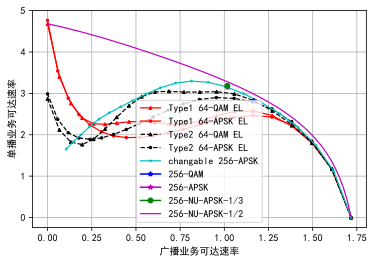

In [19]:
fig = plt.figure()

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
plt.grid()

plt.plot(Rbc_QAM_type1, Ruc_QAM_type1, linewidth=1.2, marker='^', markersize=3, linestyle='-', color='r')
plt.plot(Rbc_APSK_type1, Ruc_APSK_type1, linewidth=1.2, marker='.', markersize=5, linestyle='-', color='r')

plt.plot(Rbc_QAM_type2, Ruc_QAM_type2, linewidth=1.2, marker='^', markersize=3, linestyle='--', color='k')
plt.plot(Rbc_APSK_type2, Ruc_APSK_type2, linewidth=1.2, marker='.', markersize=5, linestyle='--', color='k')

plt.plot(Rbc_APSK_1quad_type2, Ruc_APSK_1quad_type2, linewidth=1.2, marker=(5, 2), markersize=3, linestyle='-', color='c')

plt.plot(Rbc_QAM_composite, Ruc_QAM_composite, marker=(5, 1), markersize=5, color='b')
plt.plot(Rbc_APSK_composite, Ruc_APSK_composite, marker=(5, 1), markersize=5, color='m')

plt.plot(Rbc_NU_APSK_composite2_3, Ruc_NU_APSK_composite2_3, marker='o', markersize=5, color='g')

plt.plot(R1, R2, linewidth=1.2, markersize=3, linestyle='-', color='m')

plt.xlabel("广播业务可达速率")
plt.ylabel("单播业务可达速率")

plt.legend(["Type1 64-QAM EL", "Type1 64-APSK EL", "Type2 64-QAM EL", "Type2 64-APSK EL", "changable 256-APSK", "256-QAM", "256-APSK", "256-NU-APSK-2/3", "(4QAM,64QAM)-SIC-理论界"])